<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/Tarea_SemanaAbalon_Variante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno : Valentin Gracia

Tarea Clasificadeores Abalon semana 4
Data Science G1 2021

In [229]:
# Se importan las librerias

#Clásicas
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from termcolor import colored
from google.colab import output
import missingno as msno 
import matplotlib as mpl
import matplotlib.pyplot as plt

#Widgets
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider
import ipywidgets as widgets


#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Modelo KNN Clasificador
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Modelo KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

#muestreo
from sklearn.model_selection import train_test_split

#metricsContinuo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error





#Descripcion avalon

In [230]:
abalon_df=pd.read_csv("/content/drive/MyDrive/Coding Dojo/Semana4/abalon.csv",names=["Sex","Length","Diameter","Height","Whole Weight","Shucked Weight","Viscera Weight","Shell Weight","Rings"])
abalon_df.head(3)
#backup
abalon_Ori_df=abalon_df

#Rings  + 1.5 = years

#Exploracion

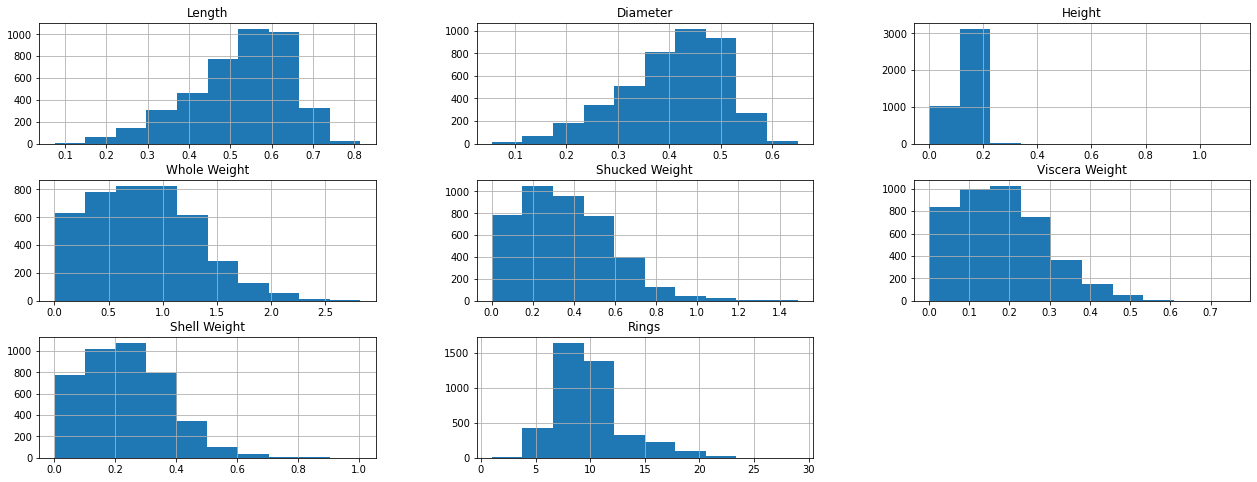

In [231]:
myLayout=(21.7,8)
abalon_df.hist(figsize=myLayout);


In [232]:
from google.colab import widgets

#estoy trabajando esta funcion.
def f(x=0):
  df=abalon_df
  output.clear()
  f=df.iloc[:,[x]];
  f=f.value_counts()
  f=pd.DataFrame(f)
  #print(f"csm {df.iloc[:,[x]].columns}")
  #print("Variable ", colored(f"*{df.iloc[:,[x]].column}*",'red'))
  #f.index.name =df.iloc[:,[x]].columns
  f.columns = ['count']

  print("Variable ", colored(f"*{x}*  dtype:{df.dtypes[x]}",'red'))
  print("-----")
  print(f"{len(f.index)} Categorias")
  print(f"{df.shape[0]-f.values.sum()} perdidos de  {df.shape[0]}")
  if len(f.index)== df.shape[0]:
    print("UNICO, se podria usar de indice")
 
 
  return f;
  
interact(f, x=(0,len(abalon_df.columns)-1))

interactive(children=(IntSlider(value=0, description='x', max=8), Output()), _dom_classes=('widget-interact',)…

<function __main__.f>

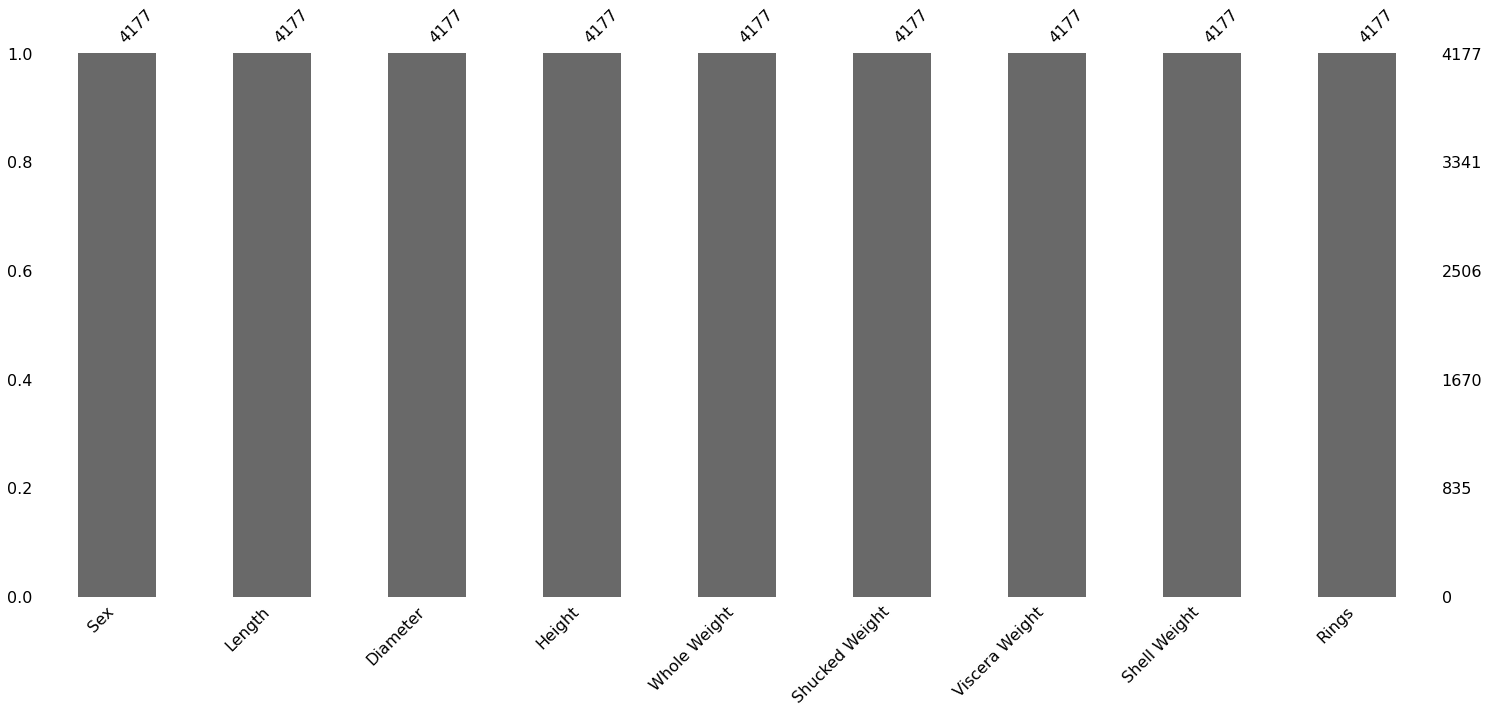

In [233]:
msno.bar(abalon_df);

#Codificacion Data Set, columna Sex

definimos X e Y

In [234]:
abalon_df=pd.get_dummies(abalon_df,prefix=["Sex"],columns=["Sex"])
abalon_df

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


#Regresion Lineal

In [235]:
X=abalon_df.drop(columns="Rings")
Y=abalon_df["Rings"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0,train_size=0.25 )



In [236]:
# inicializacion
model=LinearRegression(fit_intercept=True)
#entrenamiento


In [237]:
model.fit(X_train,y_train)

#predecimos con X_train
y_preds=model.predict(X_test)

y_preds

array([13.59375   ,  9.28515625, 10.9765625 , ...,  6.9921875 ,
       14.8515625 ,  7.4453125 ])

In [238]:
#validamos 
len(Y_preds)

model.score(X_test,y_test)

0.5257658783902274

nuestro modelo es explicado en un 53% por nuestro modelo, es decir CLW

#hora por KNNClasificador


In [239]:
scaler = StandardScaler()
# Ajusta en X (asumiendo que tu matriz de características es una matriz NumPy)
scaler.fit(X)
# Transform X
X = scaler.transform(X);

In [240]:
knn = KNeighborsClassifier(n_neighbors=1)

In [241]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [242]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [243]:
y_preds=knn.predict(X_test)
y_preds

array([13,  8,  9, ...,  6, 10,  9])

In [244]:
score = knn.score(X_test,y_test)
score

0.2052345994254708

#KNN Regresor

In [245]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
y_preds=neigh.predict(X_test)
y_preds

array([13. ,  8.5,  9. , ...,  6.5, 13. ,  9. ])

In [246]:
score=neigh.score(X_test,y_test)
score

0.3810004112727239

#Ahora predicciones para Sexo con Knn Clasificador


reordenamos X,Y

In [247]:
X=abalon_Ori_df.drop(columns=["Sex"])
Y=abalon_Ori_df["Sex"]
Y

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [248]:
scaler = StandardScaler()
# Ajusta en X (asumiendo que tu matriz de características es una matriz NumPy)
scaler.fit(X)
# Transform X
X = scaler.transform(X);

In [249]:
knn = KNeighborsClassifier(n_neighbors=1)

In [250]:
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [251]:
Y_preds=knn.predict(X)
Y_preds

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

In [252]:
score=knn.score(X,Y)
score

1.0

#Preguntas

Preguntas para pensar y responder
Una vez que hayas completado la tarea, responde las siguientes preguntas:

¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando no usaste la división entrenar probar?

R: KNN Classificador  r2 100%

¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando usaste la división entrenar probar?

R: regresion Lineal (mantuvo su factor explicativo), los otros empeoraron su factor explicativo.

 ¿Hubo alguna ventaja en la regresión lineal en términos de la cantidad de código que tenías que escribir?

R:No en primera insancia.

¿Hay alguna forma de mostrarle a alguien cuál de los dos modelos fue más efectivo?

si expresando mas de una metrica, en contexto. atravez de tabla o gráfico.

¿Crees que podrías haber mejorado KNN para mejorar la eficacia del modelo?

-no aún